# Genome Assembly Evaluation

In [1]:
for numero in [1,2,3,4]:
  print(numero)

1
2
3
4


In [2]:
for idx, numero in enumerate([1,2,3,4]):
  print(idx, numero)

0 1
1 2
2 3
3 4


In [3]:
for base in "ACGGGGCGGTGTTGACTTGTGAGCCGGCGGAG":
  print(base)

A
C
G
G
G
G
C
G
G
T
G
T
T
G
A
C
T
T
G
T
G
A
G
C
C
G
G
C
G
G
A
G


In [4]:
for idx, base in enumerate("ACGGGGCGGTGTTGACTTGTGAGCCGGCGGAG"):
  print(idx, base)

0 A
1 C
2 G
3 G
4 G
5 G
6 C
7 G
8 G
9 T
10 G
11 T
12 T
13 G
14 A
15 C
16 T
17 T
18 G
19 T
20 G
21 A
22 G
23 C
24 C
25 G
26 G
27 C
28 G
29 G
30 A
31 G


In [5]:
for idx, base in enumerate("ACGGGGCGGTGTTGACTTGTGAGCCGGCGGAG"):
  if base=="A":
    print(idx, base)

0 A
14 A
21 A
30 A


In [6]:
for idx, base in enumerate("ACGGGGCGGTGTTGACTTGTGAGCCGGCGGAG"):
  if base=="A":
    print(idx, base)
    break

0 A


## Reading the Fasta File




In [7]:
import requests 
file = requests.get("http://200.239.92.140/curso_python/contigs1.fasta")
fasta = file.text

In [8]:
fasta

'>seq1_len200_cov986_read144.082_maxK135\nACGGGGCGGTGTTGACTTGTGAGCCGGCGGAGGTGTTGCCGATGGCGCAGAGGTATTTTTTGTTCTAGCTGGTGGGTGGG\nATGGGCTTGGGTTTGTTGTTGTTGGTTCATCCCTTGTATCGTCCCCTGCCGGGGCCGACTCACTTTTCTTTGTCTTGCCA\nAAGAAAAGTAAGCAAAAGAAAGGCGCGCCCGAGATGGCGA\n>seq2_len135_cov29_read144.082_maxK135\nACATTCTTTGTCTTGCCAAAGAAAGTAAGCAAAGAAAGGCGCGCCCGAGATGGCGACCCACCCCTTGAATTTATGTCGCA\nGGGAGGGGAAGGGAAAAACTCGCTGCGCTCAAACAGTTTCCCTTCCTTTTTCCTC\n>seq3_len256_cov300_read144.082_maxK135\nACGGGGCGGTGTTGACTTGTGAGCCGGCGGAGGTGTTGCCGATGGCGCAGAGGTATTTTTTGTTCTAGCTGGTGGGTGGG\nATGGGCTTGGGTTTGTTGTTGTTGGTTCATCCCTTGTATCGTCCCCTGCCGGGGGCGACTCACTTTCTTTGTCTTGCCAA\nAGAAAGTAAGCAAAGAAAGGCGCGCCCGAGATGGCGACCCATCCCTTGAATTTTCGTAACCGGACGGAGACGGGAAAAAC\nTCGCTTCGCTCAGACA\n>seq4_len141_cov186_read144.082_maxK135\nGCCTTCCGGCGGGACGGCGTGCTCGCTGACGCGGGTGCCGTCGCCGACTGCGCGCCGCGCGCGATGCCCAGGCGGTAGCC\nGCCATATACCGCGGCGCCGAGCACGGCCAGCCCCGCTGCCACTGCAACGATGGTCTTTTTC\n>seq5_len151_cov29_read144.082_maxK135\nGGCAATGCCGATCTCTCGCAGCGCACGGAAGAGCAGGCTTCG

In [9]:
res=requests.get("http://200.239.92.140/curso_python/contigs1.fasta")
#res=requests.get("https://raw.githubusercontent.com/SantosRAC/iii_workshoppythondadosbiologicos/master/DadosAtividadesPraticas/RommelRamos/contigs1.fasta")
fasta="contigs1.fasta"
with open(fasta, 'w') as fh:
  fh.write(res.text)

In [10]:
fasta

'contigs1.fasta'

## Playing a little with biopython

In [11]:
!pip install Bio

     |████████████████████████████████| 71kB 4.7MB/s 
     |████████████████████████████████| 2.3MB 10.6MB/s 


In [12]:
from Bio.Seq import Seq

In [13]:
contigseq = Seq("GGCGGAAAACGGAAGGAGGCCTGTCTGAGCGCAGCGAGTTTGCCTCCTTCCCCGCCCGGTCACACAAATTCAAGGGGAAGTCGCCATCTCGGGCGCGCCTGTCTTTTGCTTACTTTTCTTTGGCAAGACAAAGAAAAGTGAGT")

In [14]:
contigseq.complement()

Seq('CCGCCTTTTGCCTTCCTCCGGACAGACTCGCGTCGCTCAAACGGAGGAAGGGGC...TCA')

In [15]:
contigseq.reverse_complement()

Seq('ACTCACTTTTCTTTGTCTTGCCAAAGAAAAGTAAGCAAAAGACAGGCGCGCCCG...GCC')

In [16]:
from Bio.SeqRecord import SeqRecord

In [17]:
simple_seq_r = SeqRecord(contigseq)

In [18]:
simple_seq_r.id

'<unknown id>'

In [19]:
simple_seq_r.id="seq820_len143_cov29_read144.082_maxK135"

In [20]:
simple_seq_r.description="Contig number 840 that has length equal to 143 and sequencing coverage 144"

In [21]:
from Bio import SeqIO

In [22]:
for seq_record in SeqIO.parse(open(fasta), "fasta"):
  print(seq_record.id)
  print(seq_record.seq)

seq1_len200_cov986_read144.082_maxK135
ACGGGGCGGTGTTGACTTGTGAGCCGGCGGAGGTGTTGCCGATGGCGCAGAGGTATTTTTTGTTCTAGCTGGTGGGTGGGATGGGCTTGGGTTTGTTGTTGTTGGTTCATCCCTTGTATCGTCCCCTGCCGGGGCCGACTCACTTTTCTTTGTCTTGCCAAAGAAAAGTAAGCAAAAGAAAGGCGCGCCCGAGATGGCGA
seq2_len135_cov29_read144.082_maxK135
ACATTCTTTGTCTTGCCAAAGAAAGTAAGCAAAGAAAGGCGCGCCCGAGATGGCGACCCACCCCTTGAATTTATGTCGCAGGGAGGGGAAGGGAAAAACTCGCTGCGCTCAAACAGTTTCCCTTCCTTTTTCCTC
seq3_len256_cov300_read144.082_maxK135
ACGGGGCGGTGTTGACTTGTGAGCCGGCGGAGGTGTTGCCGATGGCGCAGAGGTATTTTTTGTTCTAGCTGGTGGGTGGGATGGGCTTGGGTTTGTTGTTGTTGGTTCATCCCTTGTATCGTCCCCTGCCGGGGGCGACTCACTTTCTTTGTCTTGCCAAAGAAAGTAAGCAAAGAAAGGCGCGCCCGAGATGGCGACCCATCCCTTGAATTTTCGTAACCGGACGGAGACGGGAAAAACTCGCTTCGCTCAGACA
seq4_len141_cov186_read144.082_maxK135
GCCTTCCGGCGGGACGGCGTGCTCGCTGACGCGGGTGCCGTCGCCGACTGCGCGCCGCGCGCGATGCCCAGGCGGTAGCCGCCATATACCGCGGCGCCGAGCACGGCCAGCCCCGCTGCCACTGCAACGATGGTCTTTTTC
seq5_len151_cov29_read144.082_maxK135
GGCAATGCCGATCTCTCGCAGCGCACGGAAGAGCAGGCTTCGTCTCTGGAAGAAACCGCGTCGAGCATGGA

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
for seq_record in SeqIO.parse(open(fasta), "fasta"):
  if seq_record.id == "seq924_len156_cov129_read144.082_maxK135":
    print(seq_record.seq)

TCGAAATACTAGGATGAGGAGTTTTATGGGTCAAGGCGATTCCACATCCCCGCAAGGGGCACCGATGGACAACATCCTCGCGCAACATCGCACGCTCCGCCGGACTCAGCGCTGCAAGCATCCGCTCTTCTGTCTGCACATGCGAGGCGACCAAGC


In [37]:
for seq_record in SeqIO.parse(open(fasta), "fasta"):
  if seq_record.id == "seq924_len156_cov129_read144.082_maxK135":
    print(len(seq_record.seq))

156


In [38]:
for seq_record in SeqIO.parse(open(fasta), "fasta"):
  if seq_record.id == "seq924_len156_cov129_read144.082_maxK135":
   for index, letter in enumerate(seq_record.seq):
    print("%i %s" % (index, letter))

0 T
1 C
2 G
3 A
4 A
5 A
6 T
7 A
8 C
9 T
10 A
11 G
12 G
13 A
14 T
15 G
16 A
17 G
18 G
19 A
20 G
21 T
22 T
23 T
24 T
25 A
26 T
27 G
28 G
29 G
30 T
31 C
32 A
33 A
34 G
35 G
36 C
37 G
38 A
39 T
40 T
41 C
42 C
43 A
44 C
45 A
46 T
47 C
48 C
49 C
50 C
51 G
52 C
53 A
54 A
55 G
56 G
57 G
58 G
59 C
60 A
61 C
62 C
63 G
64 A
65 T
66 G
67 G
68 A
69 C
70 A
71 A
72 C
73 A
74 T
75 C
76 C
77 T
78 C
79 G
80 C
81 G
82 C
83 A
84 A
85 C
86 A
87 T
88 C
89 G
90 C
91 A
92 C
93 G
94 C
95 T
96 C
97 C
98 G
99 C
100 C
101 G
102 G
103 A
104 C
105 T
106 C
107 A
108 G
109 C
110 G
111 C
112 T
113 G
114 C
115 A
116 A
117 G
118 C
119 A
120 T
121 C
122 C
123 G
124 C
125 T
126 C
127 T
128 T
129 C
130 T
131 G
132 T
133 C
134 T
135 G
136 C
137 A
138 C
139 A
140 T
141 G
142 C
143 G
144 A
145 G
146 G
147 C
148 G
149 A
150 C
151 C
152 A
153 A
154 G
155 C


In [39]:
for seq_record in SeqIO.parse(open(fasta), "fasta"):
  if seq_record.id == "seq924_len156_cov129_read144.082_maxK135":
   print(seq_record.seq[0]) # Remember that in Python, indexes start; indexes start from zero and sequences behave like strings

T


In [40]:
for seq_record in SeqIO.parse(open(fasta), "fasta"):
  if seq_record.id == "seq924_len156_cov129_read144.082_maxK135":
   print(seq_record.seq.count("ATC")) # match of "ATC" without replacement

4


In [41]:
from Bio.SeqUtils import GC

In [42]:
for seq_record in SeqIO.parse(open(fasta), "fasta"):
  if seq_record.id == "seq924_len156_cov129_read144.082_maxK135":
   print(GC(seq_record.seq))

58.333333333333336


### Locally

In [43]:
fasta = open("contigs1.fasta","r")

In [44]:
sequence="" # nucleotides sequence
seqs=[] # List to store the size of contigs

for line in fasta:
    if not line.startswith(">"): # Checks if the line is not a header
        sequence = sequence + line.rstrip("\n")

    else:
        contig_size = len(sequence) 
        seqs.append(contig_size)
        sequence = ""
        
seqs.sort(reverse=True) # Sort the list from longest sequence to shortest sequence
seqs.remove(seqs[-1])
print(seqs)

[84111, 79787, 73718, 73506, 67737, 64900, 54455, 53898, 51332, 50545, 50021, 49052, 44003, 42776, 42119, 41730, 41500, 41315, 40869, 39794, 39720, 39326, 39132, 39110, 37805, 36620, 36600, 36406, 36348, 35339, 34286, 33748, 33690, 33597, 33255, 32394, 32020, 31699, 31670, 31457, 31407, 31367, 31015, 30877, 30873, 30519, 29904, 29582, 29393, 29358, 29185, 29016, 28950, 28163, 27713, 26990, 26892, 26696, 26391, 26339, 25350, 25308, 25307, 25165, 25010, 25010, 24584, 24519, 24261, 23994, 23913, 23724, 23415, 23380, 23346, 23093, 22731, 22709, 22706, 22704, 21348, 21192, 21153, 21021, 20772, 20638, 20558, 20445, 20137, 20098, 20042, 19849, 19765, 19734, 19674, 19585, 19551, 19336, 19060, 18655, 18182, 18113, 18000, 17931, 17720, 17118, 16719, 16693, 16546, 16433, 15977, 15941, 15939, 15886, 15770, 15698, 15483, 15222, 14943, 14868, 14715, 14650, 14638, 14568, 14309, 14308, 14205, 14166, 14150, 13914, 13841, 13706, 13471, 13433, 13236, 13148, 12956, 12948, 12771, 12744, 12728, 12717, 12710

## Evaluation Metrics

Total bases and contigs, largest and smallest contig

In [47]:
total_contigs = len(seqs)
print (total_contigs)

total_bases = sum(seqs)
print ("Bases:"+ str(total_bases))

longest_contig = seqs[0] # List sorted from longest to shortest
shortest_contig = seqs[total_contigs-1] # List sorted from longest to shortest
print("Longest Size:"+str(longest_contig))
print("Shortest Size:"+str(shortest_contig))

3432
Bases:5703192
Longest Size:84111
Shortest Size:135


### N50 (number that represents the size of the contig in base pairs whose values equal and above added up represent 50% of the total of bases; L50 number of contigs traveled to reach the N50)


In [48]:
half_bases = total_bases/2
N50 = 0
L50 = 1

for value in seqs:
    N50=N50+value
    if (N50>=half_bases):
        print("N50:"+str(N50))
        break
    else:
        L50 +=1
        
print ("L50:"+str(L50))

N50:2852249
L50:80


### Counting the frequency of sizes

In [49]:
import collections
from collections import Counter

frequency = collections.Counter(seqs)
#print (frequency) # Printing collections.Counter

size, freq = zip(*Counter(frequency).items()) # Unpacking the collections.Counter to two arrays
for idx in range(0,len(size)):
    print (str(size[idx])+'-'+str(freq[idx])) # Printing the contigs size and frequencies

84111-1
79787-1
73718-1
73506-1
67737-1
64900-1
54455-1
53898-1
51332-1
50545-1
50021-1
49052-1
44003-1
42776-1
42119-1
41730-1
41500-1
41315-1
40869-1
39794-1
39720-1
39326-1
39132-1
39110-1
37805-1
36620-1
36600-1
36406-1
36348-1
35339-1
34286-1
33748-1
33690-1
33597-1
33255-1
32394-1
32020-1
31699-1
31670-1
31457-1
31407-1
31367-1
31015-1
30877-1
30873-1
30519-1
29904-1
29582-1
29393-1
29358-1
29185-1
29016-1
28950-1
28163-1
27713-1
26990-1
26892-1
26696-1
26391-1
26339-1
25350-1
25308-1
25307-1
25165-1
25010-2
24584-1
24519-1
24261-1
23994-1
23913-1
23724-1
23415-1
23380-1
23346-1
23093-1
22731-1
22709-1
22706-1
22704-1
21348-1
21192-1
21153-1
21021-1
20772-1
20638-1
20558-1
20445-1
20137-1
20098-1
20042-1
19849-1
19765-1
19734-1
19674-1
19585-1
19551-1
19336-1
19060-1
18655-1
18182-1
18113-1
18000-1
17931-1
17720-1
17118-1
16719-1
16693-1
16546-1
16433-1
15977-1
15941-1
15939-1
15886-1
15770-1
15698-1
15483-1
15222-1
14943-1
14868-1
14715-1
14650-1
14638-1
14568-1
14309-1
14308-1


### Plotting the size distribution of contigs

In [50]:
import matplotlib.pyplot as plt

(130.0, 600.0)

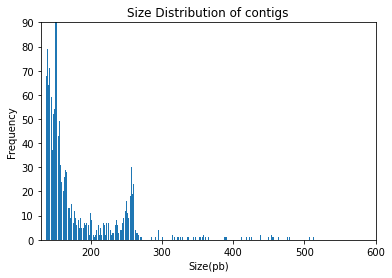

In [51]:
plt.bar(size[400:603],freq[400:603])
plt.title('Size Distribution of contigs')
plt.xlabel('Size(pb)')
plt.ylabel('Frequency')
plt.ylim(0, 90)
plt.xlim(130, 600)